In [5]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import numba
from numba import njit, jit
from statistics import mean
from sklearn.datasets.samples_generator import make_blobs
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin

class Kmeans(BaseEstimator, ClusterMixin, TransformerMixin):               # Input: processed dataset, Output: clustered data (kmeans, kmeans++)
    def __init__(self, inits=10, k=8, maxit=300, method="++", tol = 1e-3):
        
        self.labels_ = None
        self.cluster_centers_ = None
        self._inits = inits
        self._k = k
        self._maxit = maxit
        self._method = method
        self._tol = tol
       # dot = np.random.choice(range(len(self._data)), self._k, replace=False)
        #self._clusters = self._data[dot]
   

    def fit(self,data):
        self._data = data
        best_clust = float('inf')
        
        for i in (range(self._inits)):
            
            if self._method == "rng": # random centers are choosen
                #print("rng")
                dot = np.random.choice(range(len(self._data)), self._k, replace=False)
                self.cluster_centers_ = self._data[dot]
            elif self._method == "++": # kmeans++ is initiated
                #print("++")
                dot = np.random.choice(len(self._data), replace=False) # random startpunkt
                clusters = np.array([self._data[dot]])
                pointer = np.array([])
                for i in range (self._k-1):
                    D = np.array([])
            
                    for j in range (len(self._data)):
                        D = np.append(D,np.min(np.sum((self._data[j]-clusters)**2, axis = 1)))
                
                    pointer = np.append(pointer, D, axis = 0) 
            
                    p = D/np.sum(D)
                    cummulative_p = np.cumsum(p)
            
                    r = random.random()
                    ind = np.where(cummulative_p >= r)[0][0]
            
                    clusters = np.append(clusters,[self._data[ind]], axis = 0)
                self.cluster_centers_ = clusters
            else:
                raise AttributeError("No valid method")

            old_centroids = None
            
            for i in range(self._maxit):
                old_centroids = self.cluster_centers_.copy()
                clusters = np.expand_dims(self.cluster_centers_, axis=1)
                data = np.expand_dims(self._data, axis=0)
                eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
                self.labels_ = np.argmin(eucl, axis = 0)
                for i in range(self._k): # range of clusters
                    position = np.where(self.labels_ == i) # position im array bestimmen und dann die entspechenden punkte aus data auslesen
                    self.cluster_centers_[i] = self._data[position].mean(axis = 0)
                    #out = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
                overall_quality = np.sum(np.min(eucl.T, axis=1))
                if overall_quality < best_clust:
                    best_clust = overall_quality
                    best_dist = self.labels_
                    best_centers = self.cluster_centers_
                if np.linalg.norm(self.cluster_centers_ - old_centroids) < self._tol:
                    break
            self.cluster_centers_ = best_centers
            self.labels_ = best_dist
            self.inertia_ = best_clust
                
        return self
   
    
    def predict(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
        self.labels_ = np.argmin(eucl, axis = 0)
        return self.labels_ #returns the cluster with minimum distance
    
    def transform(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2)
        return eucl.T

In [2]:
### importieren
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs #random data generator
import pandas as pd
import time

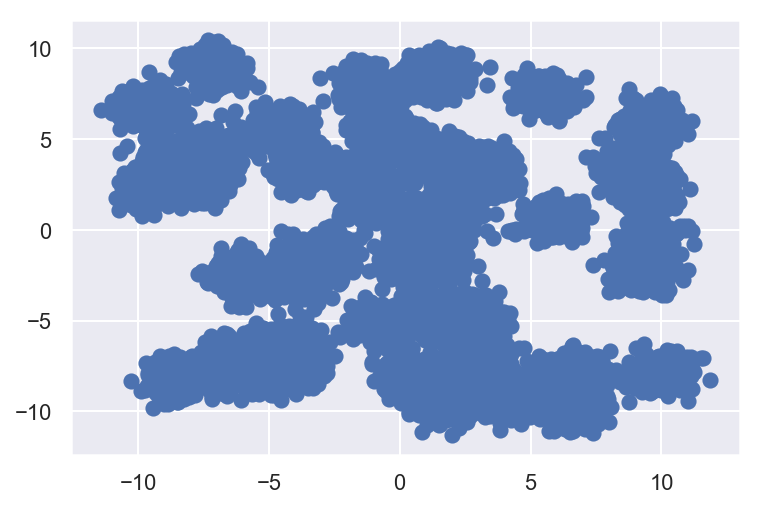

In [78]:
#generate data
X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0, )
plt.scatter(X[:, 0], X[:, 1], s=50);

# init =1

In [5]:
liste = []
lib = Kmeans(inits=1, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

Time:13.135669946670532
Mean Time:0.13135669946670533


# init =2

In [6]:
liste = []
lib = Kmeans(inits=2, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

Time:25.213059186935425
Mean Time:0.25213059186935427


# init =10

In [80]:
liste = []
lib = Kmeans(inits=10, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

Time:115.72139525413513
Mean Time:1.1572139525413514


In [8]:
from WWDK_Package import Cluster as cl

In [9]:
liste = []
lib = cl.Kmeans(inits=1, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

Time:11.600426197052002
Mean Time:0.11600426197052002


In [10]:
import sklearn.cluster as sk
sk_kmeans = sk.KMeans(init="random",n_init=1)
liste = []
for i in range(100):
    start = time.time()
    sk_kmeans.fit(X)
    end = time.time()
    liste.append(end-start)
    #print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

Time:2.2005503177642822
Mean Time:0.022005503177642823


In [11]:
lib.inertia_

22608.00682917891

In [12]:
X.dtype

dtype('float64')

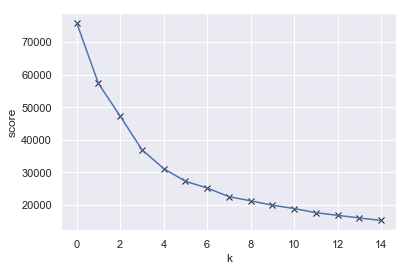

In [13]:
from WWDK_Package import Cluster as cl
liste = []
for i in range(15):
    lib = cl.Kmeans(inits=10, method="rng", k=i+1)
    lib.fit(X)
    liste.append(lib.inertia_)
    #print(lib.inertia_)
plt.plot(liste, "kx")
plt.plot(liste)
plt.xlabel("k")
plt.ylabel("score")
plt.show()

In [14]:
from WWDK_Package import Data as d

In [15]:
pbmc = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")

In [16]:
def plot(data, dist, clusters,k):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(k):
        graph = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
        center = pd.DataFrame(clusters[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )
    plt.show

IndexError: index 8 is out of bounds for axis 0 with size 8

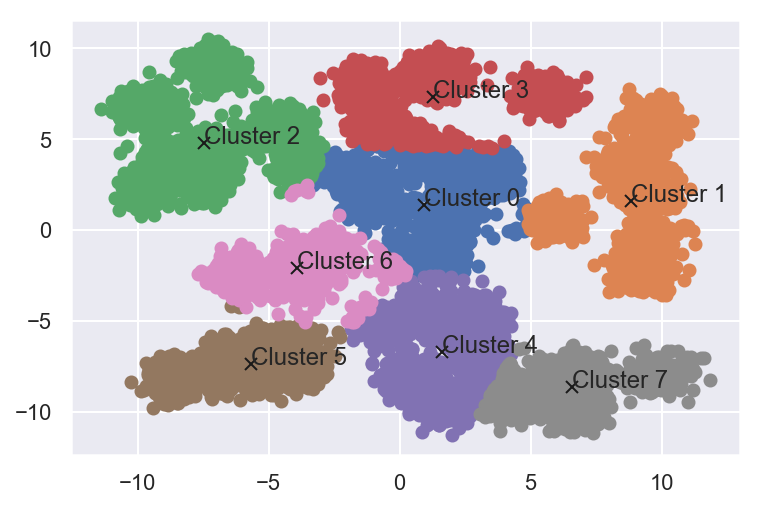

In [81]:
%config InlineBackend.figure_format = "retina"
plot(X,lib.labels_, lib.cluster_centers_, 10)

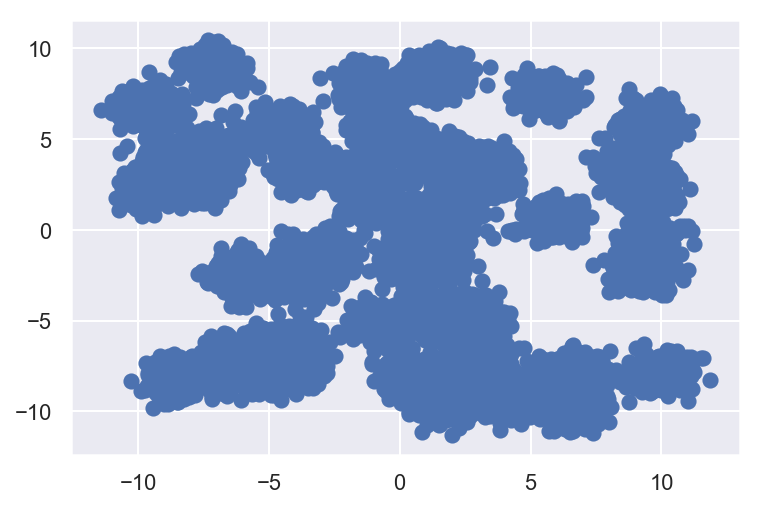

In [18]:

plt.scatter(X[:, 0], X[:, 1], s=50);

In [19]:
from sklearn.datasets import load_iris
data = load_iris()

In [20]:
iris_data = data["data"]


In [21]:
import sklearn.cluster as sk
sk_kmeans = sk.KMeans(init="random")
from WWDK_Package import Cluster as cl
wwdk_kmeans = cl.Kmeans(method="rng")

/anaconda3/envs/igem/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


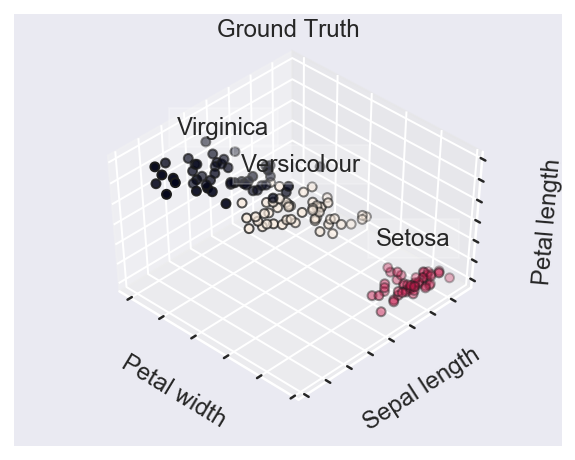

In [22]:
%config InlineBackend.figure_format = "retina"
from mpl_toolkits.mplot3d import Axes3D
#sk_kmeans.fit(iris_data)
#labels = sk_kmeans.labels_
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
y = data.target
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(iris_data[y == label, 3].mean(),
              iris_data[y == label, 0].mean(),
            iris_data[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(iris_data[:, 3], iris_data[:, 0], iris_data[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [23]:
wwdk_kmeans.fit_transform(iris_data).shape

(150, 8)

In [24]:
sk_kmeans.fit_transform(iris_data).shape

(150, 8)

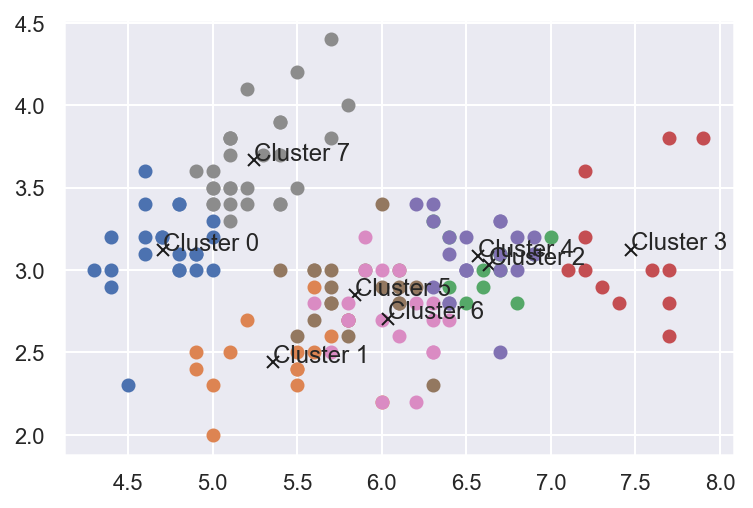

In [25]:
plot(iris_data, wwdk_kmeans.labels_, wwdk_kmeans.cluster_centers_, 8)

In [26]:
pkmn = pd.read_csv('/Users/benedict/Desktop/Programmieren/Phyton/Pokemon/pokemon.csv', index_col=0)

In [27]:
atk_def = np.array(pkmn[["Attack","Defense"]])

In [28]:
pkm_clust = cl.Kmeans(k=3)
pkm_clust.fit(atk_def)

Kmeans(inits=None, k=None, maxit=None, method=None, tol=None)

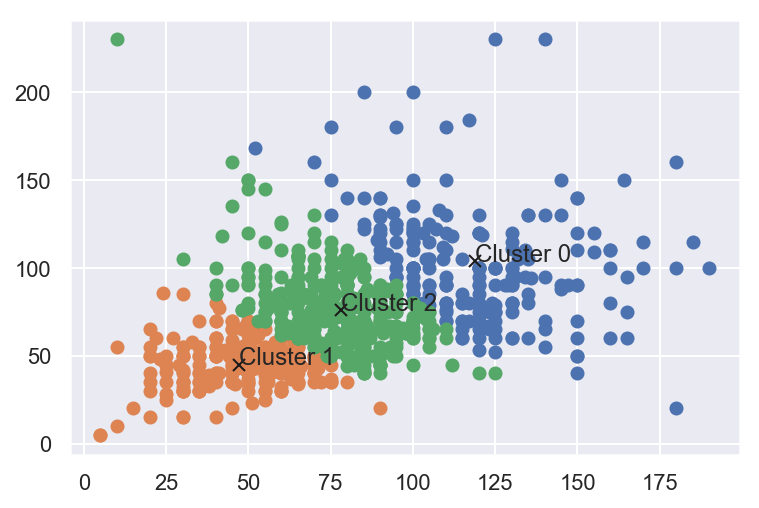

In [29]:
plot(atk_def, pkm_clust.labels_, pkm_clust.cluster_centers_, 3)

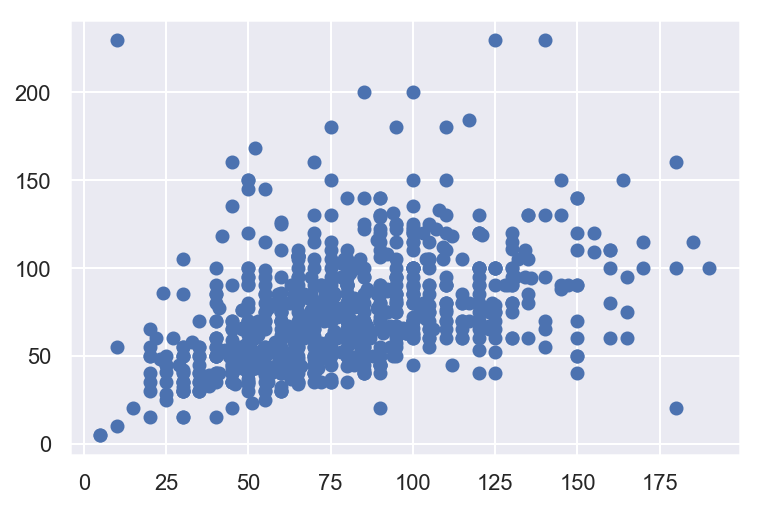

In [30]:
plt.scatter(atk_def[:,0],atk_def[:,1])


In [31]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [32]:
test = pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed", "Type 1"]]
norm = preprocessing.normalize(test[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
scaled = preprocessing.scale(norm)
types = np.array(test["Type 1"].drop_duplicates())
type_list = np.array(test["Type 1"])

In [33]:
pca = PCA()
one = pca.fit_transform(test[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
two = pca.fit_transform(scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals= 1)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]
pca_df1 = pd.DataFrame(one, columns= labels )
pca_df2 = pd.DataFrame(two, columns= labels )


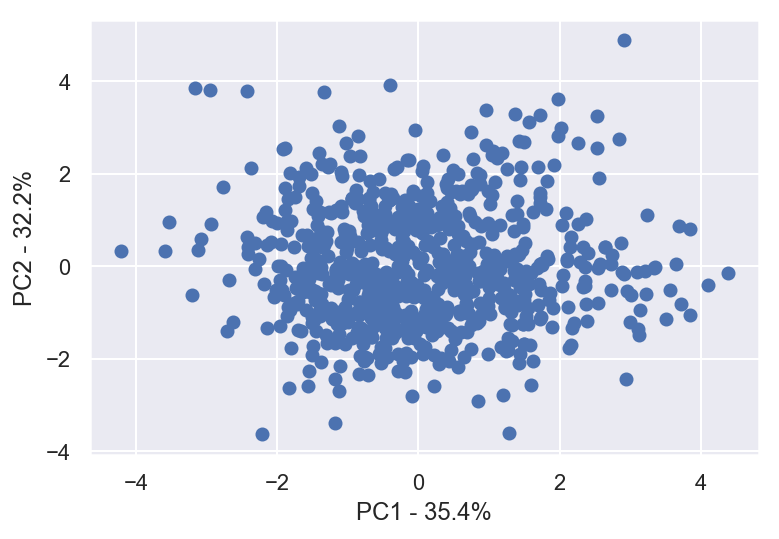

In [34]:
plt.scatter(pca_df2.PC1, pca_df2.PC2)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))


plt.show()

In [35]:

tsne = TSNE()
tsned =tsne.fit_transform(two)
poke_clust = cl.Kmeans(k=8)
poke_clust.fit_transform(tsned)



array([[41.92079  , 46.406555 , 23.564856 , ..., 20.06185  ,  1.6657358,
        40.5347   ],
       [42.373077 , 46.30431  , 22.924192 , ..., 20.775528 ,  0.9444706,
        40.724552 ],
       [42.329403 , 45.816685 , 22.289833 , ..., 21.115307 ,  0.4176796,
        40.43848  ],
       ...,
       [40.35345  , 36.593487 , 13.40985  , ..., 26.461067 , 10.55289  ,
        34.498756 ],
       [39.858406 , 35.333904 , 12.911121 , ..., 26.9494   , 11.7991295,
        33.56466  ],
       [26.347298 , 35.076263 , 27.946745 , ..., 13.917801 , 16.400944 ,
        25.513897 ]], dtype=float32)

In [36]:
def elbow_plot(data, iterations):
    liste = []
    for i in range(iterations):
        lib = cl.Kmeans(inits=10, method="rng", k=i+1)
        lib.fit(data)
        liste.append(lib.inertia_)
        #print(lib.inertia_)
    plt.plot(liste, "kx")
    plt.plot(liste)
    plt.xlabel("k")
    plt.ylabel("score")
    return plt.show()

In [37]:
elbow_plot()

TypeError: elbow_plot() missing 2 required positional arguments: 'data' and 'iterations'

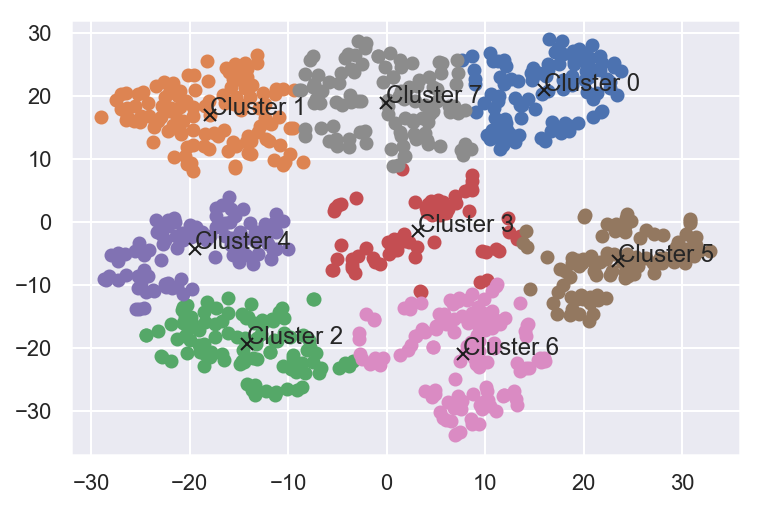

In [38]:
plot(tsned, poke_clust.labels_, poke_clust.cluster_centers_, 8)

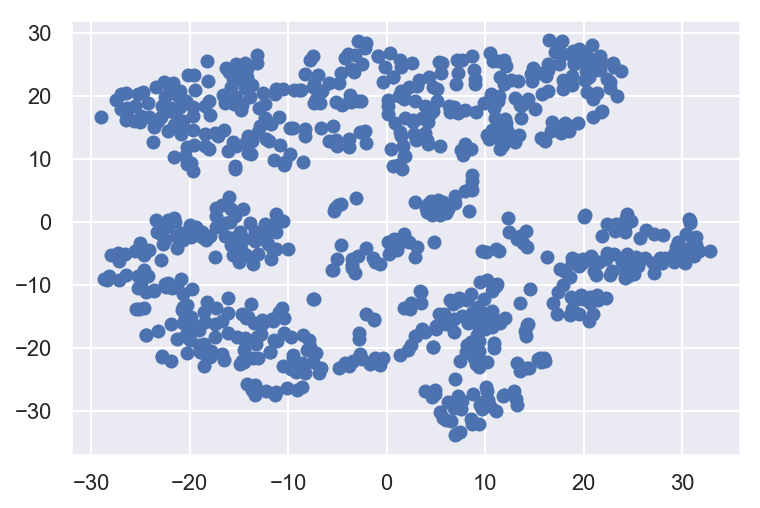

In [39]:
plt.scatter(tsned[:,0],tsned[:,1])

In [40]:
tsned.shape

(800, 2)

In [41]:
pure_sne = TSNE()
pure_sned = pure_sne.fit_transform(scaled)

/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/WWDK_Package/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


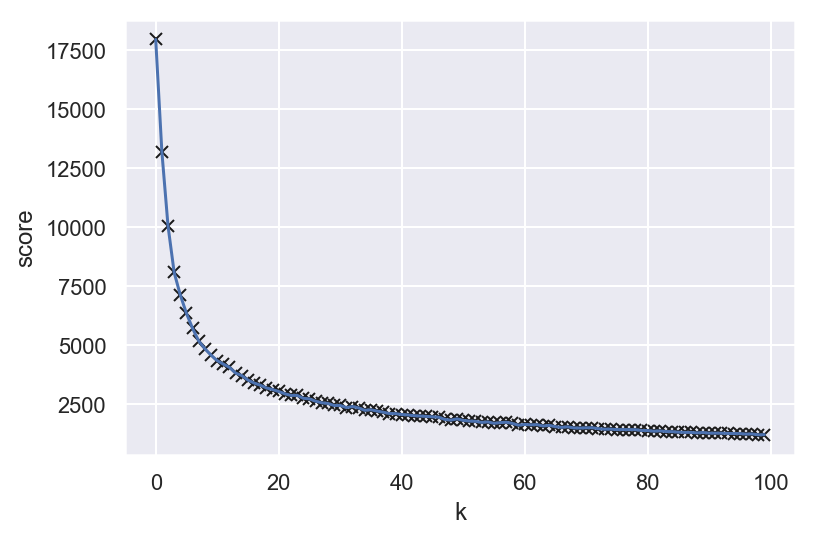

In [42]:
elbow_plot(pure_sned, 100)

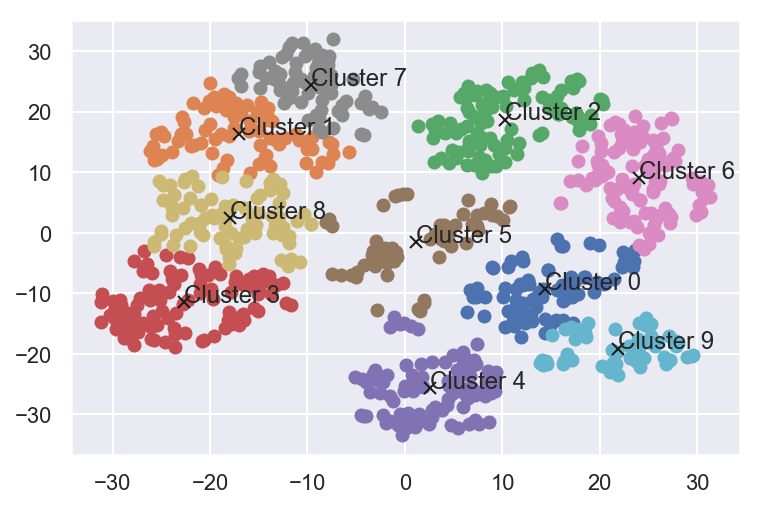

In [43]:
kmean = cl.Kmeans(k = 10)
kmean.fit(pure_sned)
plot(pure_sned, kmean.labels_, kmean.cluster_centers_, 10)

In [44]:
tsned_with_type =pd.DataFrame(pure_sned)
tsned_with_type["Type"] = type_list
#plt.scatter(tsned_with_type.iloc[:,0],tsned_with_type.iloc[:,1], c="w")


In [45]:
types
colors_shapes = ["go","rx","bv","gx", "co", "mv","yx","g^","m*","rh","mX","kD","wo","wD","rP","ko","ys","b*"]
dict_type_color = dict(zip(types,colors_shapes))

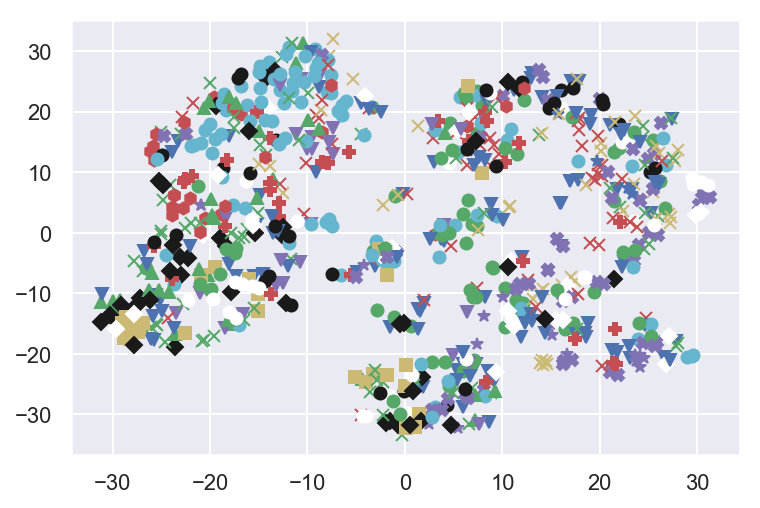

In [46]:
for i in range(tsned_with_type.shape[0]):
    color = dict_type_color[tsned_with_type.iloc[i,2]]
    plt.plot(tsned_with_type.iloc[i,0],tsned_with_type.iloc[i,1],color)

In [47]:
dict_type_color

{'Grass': 'go',
 'Fire': 'rx',
 'Water': 'bv',
 'Bug': 'gx',
 'Normal': 'co',
 'Poison': 'mv',
 'Electric': 'yx',
 'Ground': 'g^',
 'Fairy': 'm*',
 'Fighting': 'rh',
 'Psychic': 'mX',
 'Rock': 'kD',
 'Ghost': 'wo',
 'Ice': 'wD',
 'Dragon': 'rP',
 'Dark': 'ko',
 'Steel': 'ys',
 'Flying': 'b*'}

In [48]:
pkmn_red =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red["Cluster"] = kmean.labels_

In [49]:

for i in range(pkmn_red.shape[0]):
    pass


In [50]:
kmean.labels_.shape

(800,)

<function matplotlib.pyplot.show(*args, **kw)>

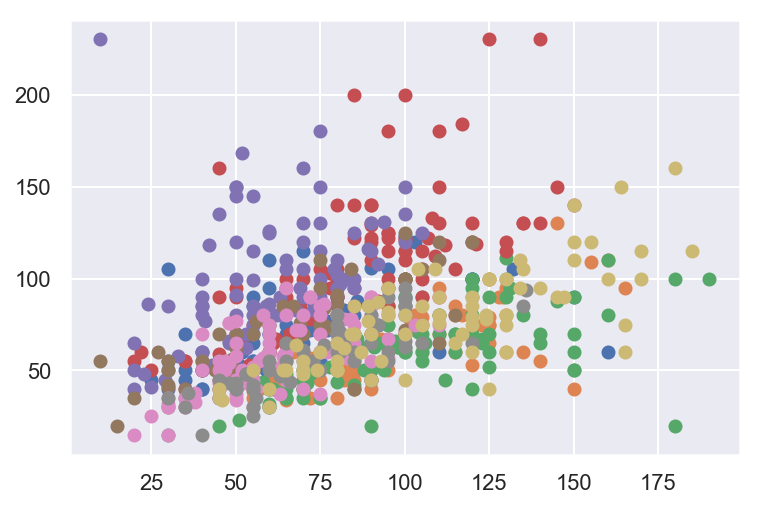

In [51]:
for i in range(9):
    Cluster0 = pkmn_red[pkmn_red.Cluster == i]
    plt.plot(Cluster0.Attack,Cluster0.Defense, "o")
plt.show

In [52]:
color = {
    0 : "b",
    1 : "g",
    2 : "r",
    3 : "c",
    4 : "m",
    5 : "y",
    6 : "k",
    7 : "w",
    8 : "b",
    9 : "g"
    
}

<function matplotlib.pyplot.show(*args, **kw)>

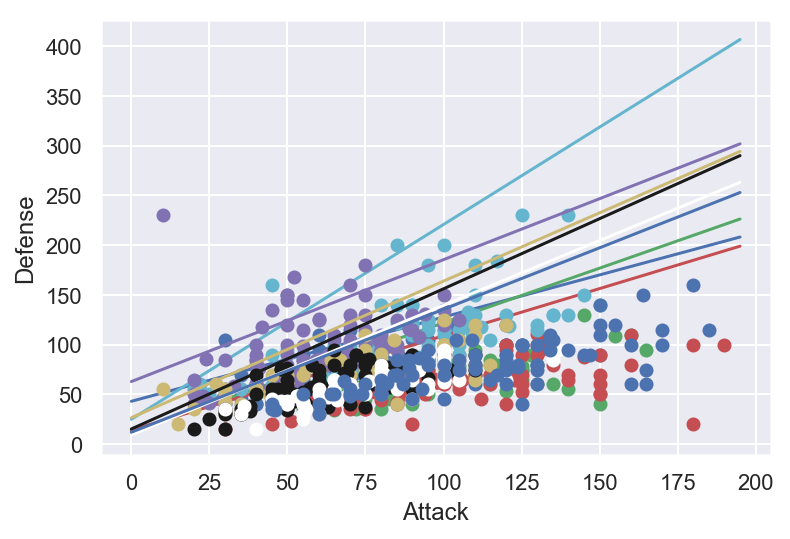

In [53]:
from sklearn.linear_model import LinearRegression

for i in range(9):
    Cluster0 = pkmn_red[pkmn_red.Cluster == i]
    linreg = LinearRegression()
    linreg.fit(np.array(Cluster0.Attack).reshape(-1, 1),np.array(Cluster0.Defense))
    
    plt.plot(Cluster0.Attack,Cluster0.Defense, "o", color= color[i])
    plt.plot(np.array((0,195)).reshape(-1, 1),linreg.predict(np.array((0,400)).reshape(-1, 1)),color= color[i])
    plt.xlabel("Attack")
    plt.ylabel("Defense")
plt.show



In [54]:
for i in range(9):
    Cluster0 = pkmn_red[pkmn_red.Cluster == i]
    print(Cluster0.Defense.mean())

72.21621621621621
65.04
61.36082474226804
105.07070707070707
98.75555555555556
72.625
57.765306122448976
55.64179104477612
77.03658536585365


In [55]:
Cluster0 = pkmn_red[pkmn_red.Cluster == 0]


In [56]:
pkmn_comparer = pkmn_red[pkmn_red.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(8):
    pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)).T)
pkmn_final.set_index("Cluster")
    

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Cluster,,,,,,,
0.0,461.513514,75.540541,70.527027,72.216216,104.337838,85.432432,53.459459
1.0,428.960000,70.600000,98.773333,65.040000,51.253333,66.866667,76.426667
2.0,487.742268,79.164948,102.113402,61.360825,101.474227,62.639175,80.989691
3.0,409.474747,65.303030,83.838384,105.070707,49.464646,54.939394,50.858586
4.0,428.155556,66.677778,59.955556,98.755556,62.766667,93.777778,46.222222
5.0,422.453125,68.000000,68.718750,72.625000,68.296875,73.828125,70.984375
6.0,437.806122,62.040816,61.826531,57.765306,93.887755,68.591837,93.693878
7.0,386.164179,57.970149,72.865672,55.641791,51.343284,56.089552,92.253731
8.0,442.621951,74.597561,107.926829,77.036585,62.012195,66.987805,54.060976


In [57]:
pkmn_final.drop(["Cluster", "Total"], axis = 1).max(axis = 0)

HP          79.164948
Attack     107.926829
Defense    105.070707
Sp. Atk    104.337838
Sp. Def     93.777778
Speed       93.693878
dtype: float64

In [58]:
pkmn_red[pkmn_red.Cluster == 5][["Attack",]].max()

Attack    120
dtype: int64

In [59]:
test = pkmn_red[pkmn_red["Attack"] >= 185]
test[test.Cluster == 4]
test

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
#,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,2
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,8


In [60]:
pkmn_red[pkmn_red["Cluster"] == 0]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
#,,,,,,,,,,,
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,0
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,0
9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,0
36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,0
43,Oddish,Grass,Poison,320,45,50,55,75,65,30,0
44,Gloom,Grass,Poison,395,60,65,70,85,75,40,0
45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,0
81,Magnemite,Electric,Steel,325,25,35,70,95,55,45,0


internet version

In [61]:
#@numba.jit(nopython=True) 
def k_means(data, k, number_of_iterations):
    n = len(data)
    number_of_features = data.shape[1]
    # Pick random indices for the initial centroids.
    initial_indices = np.random.choice(range(n), k)
    # We keep the centroids as |features| x k matrix.
    means = data[initial_indices].T
    # To avoid loops, we repeat the data k times depthwise and compute the
    # distance from each point to each centroid in one step in a
    # n x |features| x k tensor.
    repeated_data = np.stack([data] * k, axis=-1)
    all_rows = np.arange(n)
    zero = np.zeros([1, 1, 2])
    for _ in range(number_of_iterations):
        # Broadcast means across the repeated data matrix, gives us a
        # n x k matrix of distances.
        distances = np.sum(np.square(repeated_data - means), axis=1)
        # Find the index of the smallest distance (closest cluster) for each
        # point.
        assignment = np.argmin(distances, axis=-1)
        # Again to avoid a loop, we'll create a sparse matrix with k slots for
        # each point and fill exactly the one slot that the point was assigned
        # to. Then we reduce across all points to give us the sum of points for
        # each cluster.
        sparse = np.zeros([n, k, number_of_features])
        sparse[all_rows, assignment] = data
        # To compute the correct mean, we need to know how many points are
        # assigned to each cluster (without a loop).
        counts = (sparse != zero).sum(axis=0)
        # Compute new assignments.
        means = sparse.sum(axis=0).T / counts.clip(min=1).T
    return means.T

speed tests

In [62]:
import sklearn.cluster as sk

def time_k_plot(data, iterations, runs):
    liste = []
    sklearn_liste = []
    inet_liste = []
    for i in range(iterations):
        for j in range(runs):
            
            meantime =[]
            start = time.time()
            lib = cl.Kmeans(inits=10, method="rng", k=i+1, tol= 1)
            lib.fit(data)
            end = time.time()
            meantime.append(end-start)
            
            inet_meantime =[]
            start = time.time()
            k_means(data,i+1,300)
            end = time.time()
            inet_meantime.append(end-start)
            
            sk_meantime = []
            start = time.time()
            lib = sk.KMeans(init="random",n_init=i+1)
            lib.fit(data)
            end = time.time()
            sk_meantime.append(end-start)
        liste.append(np.mean(meantime))
        sklearn_liste.append(np.mean(sk_meantime))
        inet_liste.append(np.mean(inet_meantime))
     
    #print(lib.inertia_)
    plt.plot(liste)
    plt.plot(liste, "kx")
    plt.plot(sklearn_liste, "r")
    plt.plot(sklearn_liste, "kx")
    plt.plot(inet_liste, "g")
    plt.plot(inet_liste, "kx")
    plt.xlabel("k")
    plt.ylabel("time[s]")
    return plt.show()

def time_init_plot(data, iterations, runs):
    liste = []
    sklearn_liste = []
    
    for i in range(iterations):
        for j in range(runs):
            
            meantime =[]
            start = time.time()
            lib = cl.Kmeans(inits=i+1, method="rng", k=8,tol= 1)
            lib.fit(data)
            end = time.time()
            meantime.append(end-start)
            
            sk_meantime = []
            start = time.time()
            lib = sk.KMeans(init="random",n_init=i+1)
            lib.fit(data)
            end = time.time()
            sk_meantime.append(end-start)
        liste.append(np.mean(meantime))
        sklearn_liste.append(np.mean(sk_meantime))
     
    #print(lib.inertia_)
    plt.plot(liste)
    plt.plot(liste, "kx")
    plt.plot(sklearn_liste, "r")
    plt.plot(sklearn_liste, "kx")
    plt.xlabel("inits")
    plt.ylabel("time[s]")
    return plt.show()

/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/WWDK_Package/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/WWDK_Package/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


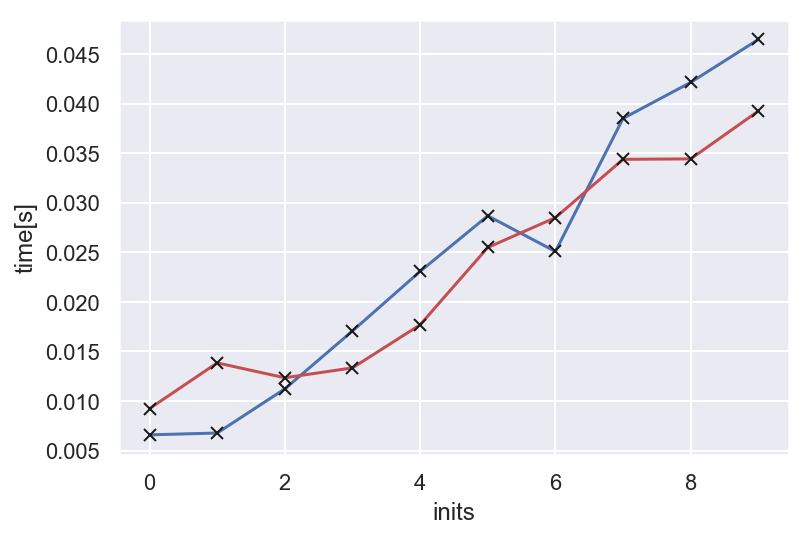

In [63]:
time_init_plot(pure_sned,10,100)

/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/WWDK_Package/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/WWDK_Package/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/WWDK_Package/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs

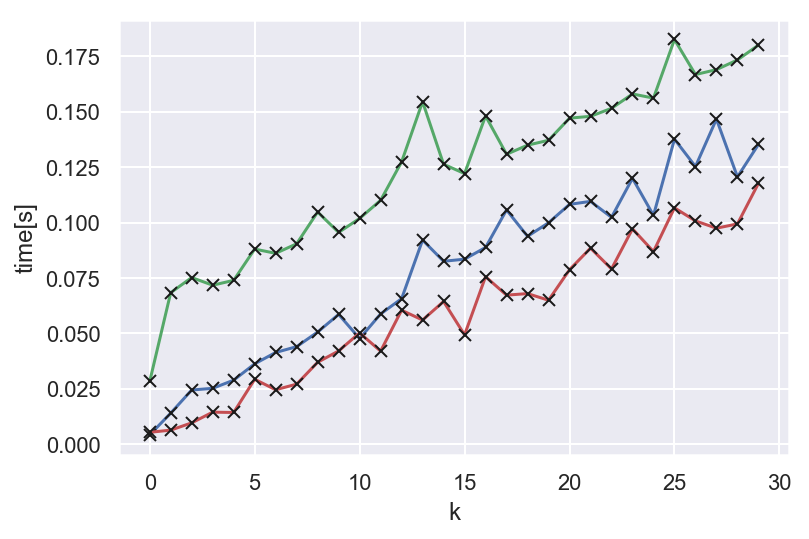

In [64]:
time_k_plot(pure_sned,30,10)


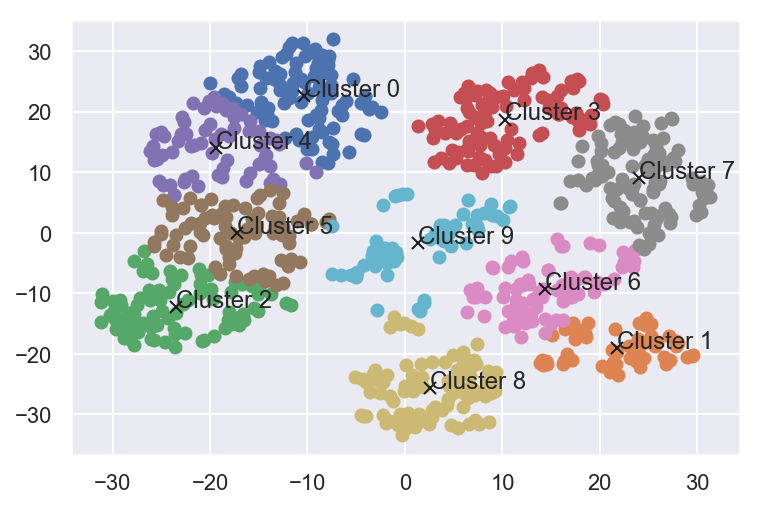

In [65]:
lib = cl.Kmeans(inits=10, method="rng", k=10, tol= 1)
lib.fit(pure_sned)
plot(pure_sned, lib.labels_, lib.cluster_centers_, 10)

### PBMC Dataset

In [1]:
from WWDK_Package import Data as d
from WWDK_Package import Cluster as cl
from WWDK_Package import Utilities as u

In [67]:
data = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")

In [68]:
#df_pbmc = data._to_df()
data.process()[0]

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
0,,,,,,,,,,,,,,,,,,,,,
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACTGGTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGACCAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGGTTCTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGTAGCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
pbmc_sorted = df_pbmc.T.sort_index()

NameError: name 'df_pbmc' is not defined

In [ ]:
pbmc_sorted

In [ ]:
def plot(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(data._k):
        graph = pd.DataFrame(data._data[np.argwhere(data.labels_ == i)].squeeze())
        center = pd.DataFrame(data.cluster_centers_[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )
    plt.show

In [ ]:
plot(lib)

In [94]:
lib._data

array([[ 2.9669628, 20.836678 ],
       [ 2.3717961, 21.325884 ],
       [ 1.7109607, 21.315344 ],
       ...,
       [-8.903783 ,  9.975529 ],
       [-9.638498 ,  8.898414 ],
       [ 3.334112 , 10.286036 ]], dtype=float32)

/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/WWDK_Package/Cluster.py:80: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


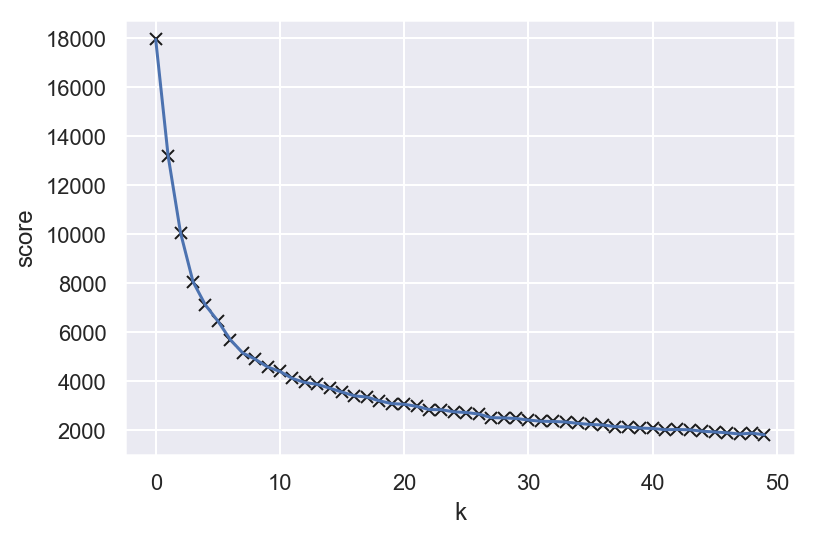

In [93]:
u.elbow_plot(pure_sned, 50)

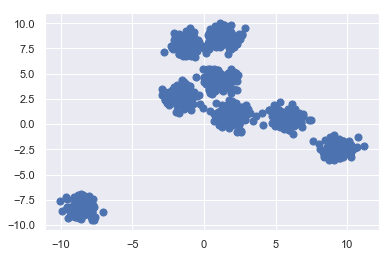

In [3]:
X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0, )
plt.scatter(X[:, 0], X[:, 1], s=50)

In [254]:
class Kmeans_overtime(BaseEstimator, ClusterMixin, TransformerMixin):               
    """Performs native k-means on a set of input data """
    def __init__(self, inits=10, k=8, maxit=300, method="++", tol = 1e-3):
        """Simple k-means clustering implementation in pure Python.
        
        Args:
            k (int): number of clusters to fit.
            inits (int): number of independent initializations to perform.
            max_iterations (int): maximum number of iterations to perform.
            method (str): method of choosing starting centers "++" or "rng"
            tol (float): tolerance for early stopping.
        """
        
        self.labels_ = None
        self.cluster_centers_ = None
        self._inits = inits
        self._k = k
        self._maxit = maxit
        self._method = method
        self._tol = tol
       
    """fits given data and calculates cluster centers and labels points accordingly"""

    def fit(self,data):
        self._data = data
        best_clust = float('inf')
        X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0, )
        
        error = False
        for c in (range(self._inits)):
            print("INIT:" +str(c))
            if error == True:
                break
            """random points from the dataset are selected as starting centers """
            if self._method == "rng": # random centers are choosen
                
                dot = np.random.choice(self._data.shape[0], self._k, replace=False)
                self.cluster_centers_ = self._data[dot]
            elif self._method == "++": # kmeans++ is initiated
                
                dot = np.random.choice(len(self._data), replace=False) # random startpunkt
                clusters = np.array([self._data[dot]])
                
                for i in range (self._k-1):
                    D = np.array([])
            
                    for j in range (len(self._data)):
                        D = np.append(D,np.min(np.sum((self._data[j]-clusters)**2, axis = 1)))
                
                     
            
                    p = D/np.sum(D)
                    cummulative_p = np.cumsum(p)
            
                    r = random.random()
                    ind = np.where(cummulative_p >= r)[0][0]
            
                    clusters = np.append(clusters,[self._data[ind]], axis = 0)
                self.cluster_centers_ = clusters
            else:
                raise AttributeError("No valid method")

            old_centroids = None

            for i in range(self._maxit):
                plt.scatter(X[:, 0], X[:, 1],c="w", s=50)
                for ie in range(self._k):
        
                    center = pd.DataFrame(self.cluster_centers_[ie]).T
                    plt.plot(center[0],center[1], "^")
               
                #print(i)
                plt.savefig("/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/plots/graph" +str(c+1)+"-"+ str(i+1)+ ".png")
                plt.clf()
                
                old_centroids = self.cluster_centers_.copy()
                clusters = np.expand_dims(self.cluster_centers_, axis=1)
                data = np.expand_dims(self._data, axis=0)
                eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
                self.labels_ = np.argmin(eucl, axis=0)
                
               # print(i)
                #print(self.cluster_centers_)
                #print(self.labels_)
                if i > 30:
                    error = True
                    break
                for i in range(self._k): # range of clusters
                    position = np.where(self.labels_ == i) # position im array bestimmen und dann die entspechenden punkte aus data auslesen
                    if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
                        print("HIT")
                        print("INIT:" +str(c))
                        print(i)
                        print(self.cluster_centers_)
                        print(self.labels_)
                        self.cluster_centers_[i] = self._data[np.random.choice(self._data.shape[0], 1, replace=False)]
                        
                    else:
                        self.cluster_centers_[i] = self._data[position].mean(axis=0)
                    #out = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
                overall_quality = np.sum(np.min(eucl.T, axis=1))
                if overall_quality < best_clust:
                    best_clust = overall_quality
                    best_dist = self.labels_
                    best_centers = self.cluster_centers_
                if np.linalg.norm(self.cluster_centers_ - old_centroids) < self._tol:
                    break
            self.cluster_centers_ = best_centers
            self.labels_ = best_dist
            self.inertia_ = best_clust
            
        return plt.show()
   
    """predicts for a given dataset the labels"""
    def predict(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
        self.labels_ = np.argmin(eucl, axis = 0)
        return self.labels_ #returns the cluster with minimum distance
    
    """creates a matrix with center-point distance for each point"""
    def transform(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2)
        return eucl.T

In [255]:
km_ot = Kmeans_overtime(method="rng", inits=200)

In [259]:
km_ot.fit(X)

INIT:0
INIT:1
INIT:2
INIT:3
INIT:4
INIT:5
INIT:6
INIT:7
INIT:8
INIT:9
INIT:10
INIT:11
INIT:12
INIT:13
INIT:14
INIT:15
INIT:16
INIT:17
INIT:18
INIT:19
INIT:20
INIT:21
INIT:22
INIT:23
INIT:24
INIT:25
INIT:26
INIT:27
INIT:28
INIT:29
INIT:30
INIT:31
INIT:32
INIT:33
INIT:34
INIT:35
INIT:36
INIT:37
INIT:38
INIT:39
INIT:40
INIT:41
INIT:42
INIT:43
INIT:44
INIT:45
INIT:46
INIT:47
INIT:48


/anaconda3/envs/igem/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: Mean of empty slice.


HIT
INIT:48
0
[[-0.32326344 -2.21191897]
 [ 9.35529598 -2.32294558]
 [ 5.00785106 -0.45306875]
 [-6.25077355 -4.70030339]
 [-0.01034691  4.12219698]
 [ 5.00410863  0.87158675]
 [ 1.74646185  0.84499282]
 [ 0.09145747  8.2782957 ]]
[5 3 6 5 7 4 1 1 7 3 6 4 3 1 3 3 7 3 6 6 5 4 4 3 4 1 7 3 4 5 1 4 7 7 4 4 4
 4 4 7 7 1 2 7 7 2 3 4 5 1 5 4 4 4 6 3 2 7 4 2 4 4 3 1 5 1 2 1 3 4 5 1 1 4
 5 1 5 7 1 3 6 1 3 3 4 3 7 4 4 5 7 6 3 7 7 6 4 3 6 4 4 4 4 4 7 6 4 4 5 1 7
 6 4 5 1 6 1 1 1 1 5 4 7 4 4 7 4 4 4 4 7 6 2 5 7 7 4 4 6 6 7 7 6 4 6 7 7 6
 1 4 4 4 4 7 7 3 5 6 3 3 6 7 4 5 3 4 6 4 7 5 4 6 4 6 4 6 7 4 7 2 1 2 4 7 6
 4 4 7 1 3 3 6 7 3 1 3 4 5 6 4 7 4 1 7 6 7 6 5 6 3 1 3 1 7 2 3 6 5 7 6 7 1
 7 4 1 7 7 7 3 3 4 6 4 6 2 4 4 7 5 1 7 4 5 6 3 1 4 4 4 6 6 7 1 5 7 6 4 6 7
 7 1 7 6 3 7 7 4 4 3 7 6 7 4 4 1 4 7 3 4 3 6 1 3 4 3 6 3 7 7 5 5 1 3 6 7 5
 7 6 7 1 5 6 7 5 7 5 6 7 1 1 3 4 6 3 4 3 3 7 7 5 4 6 6 5 4 4 4 3 4 3 4 5 7
 6 7 4 7 4 7 3 4 7 7 5 5 1 4 2 1 1 7 1 4 7 6 7 4 3 6 7 4 2 1 7 4 7 4 7 4 4
 3 3 7 3 6 4 6 4 6 

<Figure size 432x288 with 0 Axes>

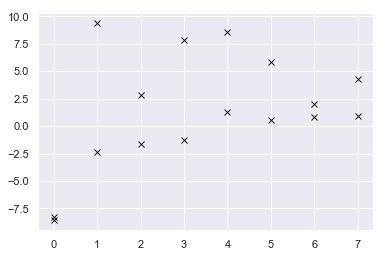

In [92]:
plt.plot(km_ot.cluster_centers_, "kx")

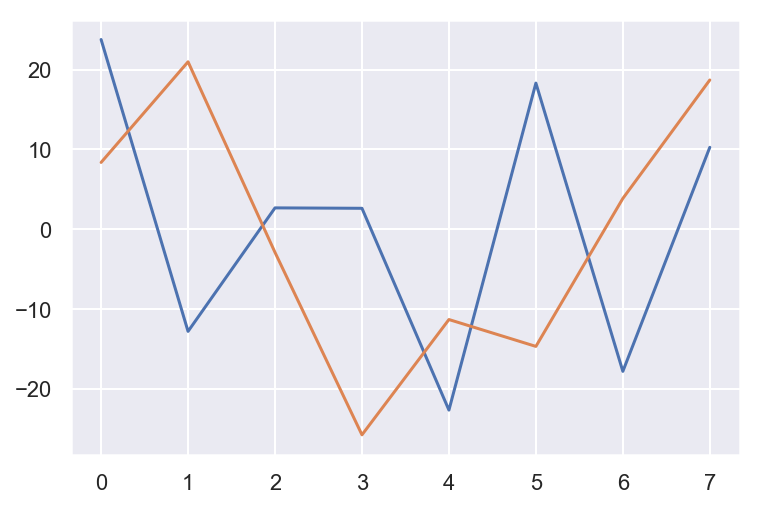

In [103]:
center = pd.DataFrame(km_ot.cluster_centers_).T
plt.plot(km_ot.cluster_centers_)
for i in range(data._k):
        
        center = pd.DataFrame(data.cluster_centers_[i]).T
        plt.plot(center[0],center[1], "kx")

In [239]:
 blubb=np.array([[-8.58705983, -8.30266872],
                 [ 9.40719151, -2.38378847],
                 [-4.62635625, -1.89775171],
                 [-1.24471881,  7.87295581],
                 [-1.50732437,  2.74657635],
                 [ 1.32582319,  8.59336818],
                 [ 4.13011558,  0.65478785],
                 [ 0.97744897,  4.05857263]])
    
blubb2 = np.array([[-8.58705983, -8.30266872],
 [ 9.40719151, -2.38378847],
 [-4.62635625 ,-1.89775171],
 [-1.24471881  ,7.87295581],
 [-1.50732437  ,2.74657635],
 [ 1.32582319  ,8.59336818],
 [ 4.13011558  ,0.65478785],
 [ 0.97744897  ,4.05857263]])

In [219]:
range(len(km_ot._data))

range(0, 1000)

In [251]:
km_ot._data[np.random.choice(km_ot._data.shape[0], 1, replace=False)]

array([[0.75726911, 8.01900287]])